In [1]:
import sys
#print(sys.version)

import matplotlib.pyplot as plt
#%matplotlib inline
#%config BackendInline.figure_format='svg'

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])
#plt.matplotlib.rcParams['figure.dpi'] = 120
#plt.matplotlib.rcParams['savefig.dpi'] = 120

import numpy as np
import pandas as pd

#import mlgrad.model as model
import mlgrad.func as func
import mlgrad.distance as distance
#import mlgrad.regular as regular
#import mlgrad.loss as loss
import mlgrad.weights as weights
import mlgrad.averager as averager

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, drisk

In [2]:
def generate_blob(N, q=0.2):
    Nq = int(N*(1-q))
    X = 4*np.random.random((N,2))-2
    X[Nq:] = 0.2 * X[Nq:] + 4.
    return X

In [3]:
X = generate_blob(500)

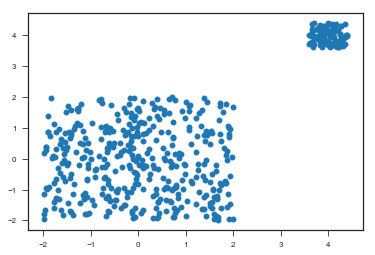

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
distfunc = distance.PowerDistance(2.)
er = drisk(X, distfunc)

def kmeans(er, h=0.004, tol=1.0e-6, n_iter=10000, callback=None):
    if er.param is None:
        er.param = np.array([1., 1.])
    alg = erm_fg(er, h=h, tol=tol, n_iter=n_iter, verbose=1, callback=callback)
    return alg

119 [0.71117967 0.63153538]


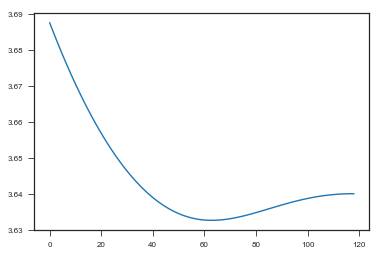

In [6]:
alg = kmeans(er)

plt.plot(alg.lvals)
plt.show()

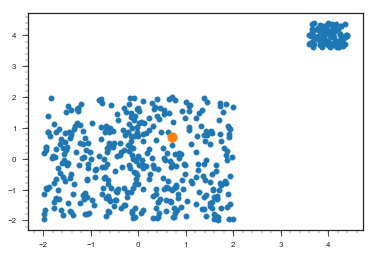

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.scatter([alg.risk.param[0]], [alg.risk.param[0]], s=100)
plt.minorticks_on()
plt.show()

In [8]:
distfunc2 = distance.EuclidDistance()
er2 = drisk(X, distfunc)

def robust_kmeans(er, h=0.01, tol=1.0e-6, n_iter=10000, callback=None):
    if er.param is None:
        er.param = np.array([1., 1.])
    wc = weights.RWeights(func.Power(0.2, 1), er)
    fg2 = fg(er, h=h, tol=tol, n_iter=n_iter, callback=callback)
    alg = erm_irgd(fg2, wc, verbose=1)
    return alg

9 [0.24488236 0.21461078]


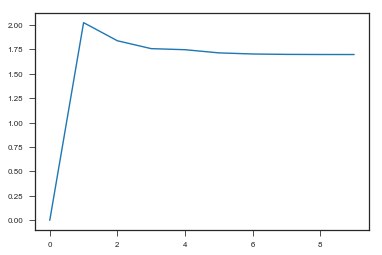

In [9]:
alg2 = robust_kmeans(er2)

plt.plot(alg2.lvals)
plt.show()

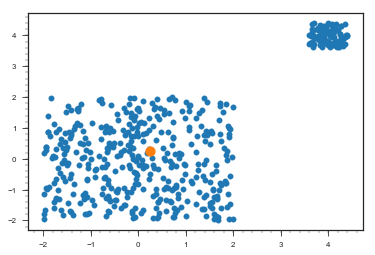

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.scatter([alg2.risk.param[0]], [alg2.risk.param[0]], s=100)
plt.minorticks_on()
plt.show()

In [11]:
distfunc3 = distance.EuclidDistance()
er3 = drisk(X, distfunc)

def resistant_kmeans(er, h=0.001, tol=1.0e-6, n_iter=10000, callback=None):
    if er.param is None:
        er.param = np.array([1., 1.])
    avrfunc = averager_it(func.QuantileFunc(0.75, func.Sqrt()))
    wc = weights.WMWeights(avrfunc, er)
    fg2 = fg(er, h=h, tol=tol, n_iter=n_iter, callback=callback)
    alg = erm_irgd(fg2, wc, verbose=1)
    return alg

5 [ 0.02454699 -0.0850181 ]


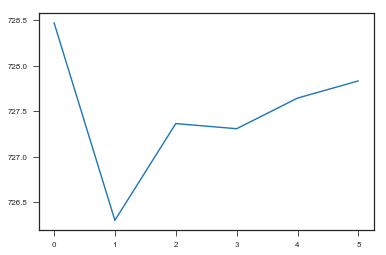

In [16]:
alg3 = resistant_kmeans(er3)

plt.plot(alg3.lvals)
plt.show()

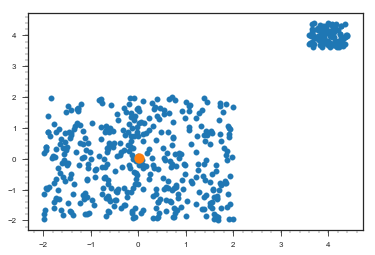

In [17]:
plt.scatter(X[:,0], X[:,1])
plt.scatter([alg3.risk.param[0]], [alg3.risk.param[0]], s=100)
plt.minorticks_on()
plt.show()